In [46]:
import numpy as np 
import matplotlib.pyplot as plt
from types import SimpleNamespace

In [47]:
with open('grid.csv', 'r') as f:
    lines = f.readlines()
    key_list = [key.strip('\n') for key in lines[0].split(',')]
    grid = {key: [] for key in key_list}
    for line in lines[1:]:
        line_split = line.split(",")
        for i, datum in enumerate(line_split):
            grid[key_list[i]].append(float(datum))

grid = {key: np.array(value) for (key, value) in grid.items()}
grid = SimpleNamespace(**grid)
grid.dx = 1 / 2**grid.L
grid.x = grid.i * grid.dx + grid.dx / 2
grid.y = grid.j * grid.dx + grid.dx / 2
grid.z = grid.k * grid.dx + grid.dx / 2
grid.r = np.sqrt((grid.x - 0.5)**2 + (grid.y - 0.5)**2 + (grid.z - 0.5)**2)


In [48]:
# check that leaf cells sum to unity
np.sum(grid.dx[grid.flag_leaf == 1]**3)


1.0

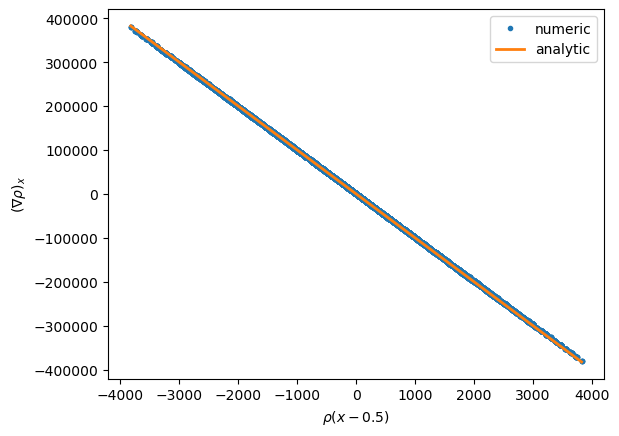

In [52]:
sigma = 0.01
rho_xm0p5 = (grid.rho * (grid.x - 0.5))[grid.flag_leaf == 1]
plt.plot(rho_xm0p5, grid.rho_grad_x[grid.flag_leaf == 1], '.', label='numeric')

x_space = np.linspace(np.min(rho_xm0p5), np.max(rho_xm0p5))
plt.plot(x_space, -x_space / sigma, lw=2, label='analytic')

#plt.ylim(-0.03, 0.03)
plt.xlabel(r"$\rho (x - 0.5)$")
plt.ylabel(r"$(\nabla \rho)_x$")
plt.legend()
